#2) Implement all  ensemble   models.
##Test Data

In [ ]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv(r"https://raw.githubusercontent.com/shubham404-error/Diabetes_ML_Class-Assignment/main/Testing_data.csv") 
data.head(10)
# data.info() 

,PCOS (Y/N),Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0,36,65.0,161.5,24.9,15,74,20,11.7,2,...,0,0,0,120,70,3,5,15.0,14.0,3.7
1,0,33,58.5,159.0,23.1,13,72,20,11.0,2,...,0,0,0,120,80,7,6,15.0,18.0,7.1
2,1,25,74.0,152.0,32.0,17,72,18,11.7,4,...,1,1,1,120,80,15,8,20.0,21.0,8.0
3,0,38,80.5,154.0,33.9,13,78,22,11.4,2,...,0,0,0,120,80,1,3,14.0,20.0,3.9
4,0,31,52.4,159.0,20.7,17,72,18,12.7,2,...,0,0,0,120,80,0,2,0.0,17.0,5.6
5,0,25,64.0,156.0,26.3,11,70,18,11.2,2,...,0,0,0,110,80,1,2,18.0,19.0,5.7
6,0,28,65.0,152.0,28.1,13,74,22,10.5,2,...,1,0,0,110,80,6,8,14.0,18.0,8.5
7,1,34,63.0,158.0,25.2,11,72,20,11.2,2,...,1,1,0,120,70,4,6,18.0,17.0,7.3
8,0,25,62.0,158.0,24.8,15,78,22,11.6,2,...,0,0,0,120,80,7,4,12.0,17.0,6.2
9,0,31,58.0,155.0,24.1,15,72,18,10.5,2,...,0,0,0,120,80,8,9,12.0,13.0,7.5


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              109 non-null    int64  
 1   Age (yrs)               109 non-null    int64  
 2   Weight (Kg)             109 non-null    float64
 3   Height(Cm)              109 non-null    float64
 4   BMI                     109 non-null    float64
 5   Blood Group             109 non-null    int64  
 6   Pulse rate(bpm)         109 non-null    int64  
 7   RR (breaths/min)        109 non-null    int64  
 8   Hb(g/dl)                109 non-null    float64
 9   Cycle(R/I)              109 non-null    int64  
 10  Cycle length(days)      109 non-null    int64  
 11  Marraige Status (Yrs)   109 non-null    float64
 12  Pregnant(Y/N)           109 non-null    int64  
 13  No. of abortions        109 non-null    int64  
 14  I   beta-HCG(mIU/mL)    109 non-null    fl

In [ ]:
data["AMH(ng/mL)"] = pd.to_numeric(data["AMH(ng/mL)"], errors='coerce')
data["II    beta-HCG(mIU/mL)"] = pd.to_numeric(data["II    beta-HCG(mIU/mL)"], errors='coerce')
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109 entries, 0 to 108
Data columns (total 42 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PCOS (Y/N)              109 non-null    int64  
 1   Age (yrs)               109 non-null    int64  
 2   Weight (Kg)             109 non-null    float64
 3   Height(Cm)              109 non-null    float64
 4   BMI                     109 non-null    float64
 5   Blood Group             109 non-null    int64  
 6   Pulse rate(bpm)         109 non-null    int64  
 7   RR (breaths/min)        109 non-null    int64  
 8   Hb(g/dl)                109 non-null    float64
 9   Cycle(R/I)              109 non-null    int64  
 10  Cycle length(days)      109 non-null    int64  
 11  Marraige Status (Yrs)   109 non-null    float64
 12  Pregnant(Y/N)           109 non-null    int64  
 13  No. of abortions        109 non-null    int64  
 14  I   beta-HCG(mIU/mL)    109 non-null    fl

In [ ]:
data['PCOS (Y/N)'].value_counts()

0    66
1    43
Name: PCOS (Y/N), dtype: int64

<AxesSubplot:xlabel='PCOS (Y/N)', ylabel='count'>

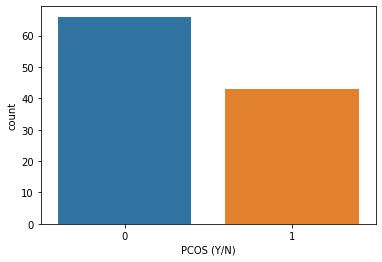

In [ ]:

sns.countplot(x=data["PCOS (Y/N)"])

In [ ]:

X=data.drop(["PCOS (Y/N)"],axis = 1)
y=data["PCOS (Y/N)"]

##Importing Libraries

In [ ]:
import sklearn
from sklearn.preprocessing import PowerTransformer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
import math
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
# from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

##Feature Scaling

In [ ]:
sscaler = MinMaxScaler() #helps us scale the dataset. This makes it easy for the model to train
cols = X.columns
x_scaled = sscaler.fit_transform(X)
X_scaled = pd.DataFrame(x_scaled, columns = cols)
X_scaled

,Age (yrs),Weight (Kg),Height(Cm),BMI,Blood Group,Pulse rate(bpm),RR (breaths/min),Hb(g/dl),Cycle(R/I),Cycle length(days),...,Pimples(Y/N),Fast food (Y/N),Reg.Exercise(Y/N),BP _Systolic (mmHg),BP _Diastolic (mmHg),Follicle No. (L),Follicle No. (R),Avg. F size (L) (mm),Avg. F size (R) (mm),Endometrium (mm)
0,0.625000,0.458333,0.603448,0.447154,0.666667,0.87500,0.666667,0.653061,0.0,0.333333,...,0.0,0.0,0.0,0.50,0.0,0.1875,0.25,0.681818,0.636364,0.000000
1,0.500000,0.368056,0.517241,0.373984,0.333333,0.84375,0.666667,0.510204,0.0,0.333333,...,0.0,0.0,0.0,0.50,1.0,0.4375,0.30,0.681818,0.818182,0.237762
2,0.166667,0.583333,0.275862,0.735772,1.000000,0.84375,0.333333,0.653061,1.0,0.000000,...,1.0,1.0,1.0,0.50,1.0,0.9375,0.40,0.909091,0.954545,0.300699
3,0.708333,0.673611,0.344828,0.813008,0.333333,0.93750,1.000000,0.591837,0.0,0.333333,...,0.0,0.0,0.0,0.50,1.0,0.0625,0.15,0.636364,0.909091,0.013986
4,0.416667,0.283333,0.517241,0.276423,1.000000,0.84375,0.333333,0.857143,0.0,0.333333,...,0.0,0.0,0.0,0.50,1.0,0.0000,0.10,0.000000,0.772727,0.132867
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,0.625000,0.309722,0.206897,0.414634,0.000000,0.93750,0.666667,0.306122,0.0,0.333333,...,0.0,0.0,0.0,0.25,0.0,0.0625,0.05,0.727273,0.863636,0.377622
105,0.000000,0.319444,0.499862,0.325203,0.833333,0.84375,0.333333,0.612245,0.0,0.333333,...,0.0,0.0,0.0,0.50,1.0,0.0625,0.15,0.318182,0.863636,0.335664
106,0.458333,0.458333,0.920276,0.341463,0.833333,0.84375,0.333333,0.408163,0.0,0.333333,...,0.0,1.0,0.0,0.25,0.0,0.5625,0.35,0.818182,0.818182,0.370629
107,0.125000,0.333333,0.344828,0.394309,1.000000,0.84375,0.333333,0.408163,0.0,0.333333,...,0.0,0.0,0.0,0.25,0.0,0.3125,0.20,0.863636,0.909091,0.153846


In [ ]:
X_train,X_test, y_train, y_test = train_test_split(X , y, test_size=0.2)

##Random Forest Classifier



> Random forest is a supervised ensemble learning algorithm that is used for both classifications as well as regression problems. But however, it is mainly used for classification problems. As we know that a forest is made up of trees and more trees mean more robust forest. Similarly, the random forest algorithm creates decision trees on data samples and then gets the prediction from each of them and finally selects the best solution by means of voting. It is an ensemble method that is better than a single decision tree because it reduces the over-fitting by averaging the result.



In [ ]:
rfc = RandomForestClassifier(n_jobs=-1,n_estimators=150,max_features='sqrt',min_samples_leaf=10) #creates a Random forest model
rfc.fit(X_train, y_train) #trains model on data
pred_rfc = rfc.predict(X_test) #prediction
accuracy = accuracy_score(y_test, pred_rfc)
print(accuracy)

0.8181818181818182


## Evaluation metrics - Random Forest Classifier

Confusion matrix : [[11  0]
 [ 4  7]]
Accuracy score : 0.8181818181818182
Precision Score : 0.8666666666666667
Recall Score : 0.8181818181818181
fpr : [0. 0. 1.]
tpr : [0.         0.63636364 1.        ]
thresholds : [2 1 0]
auc : 0.8181818181818181


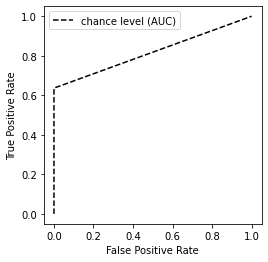

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics


print('Confusion matrix :',confusion_matrix(y_test,pred_rfc))
print('Accuracy score :', accuracy_score(y_test,pred_rfc))
print('Precision Score :', precision_score(y_test,pred_rfc,pos_label=1,average='macro'))
print('Recall Score :', recall_score(y_test,pred_rfc,pos_label=1,average='macro'))
fpr, tpr, thresholds = metrics.roc_curve(y_test,pred_rfc, pos_label=1)
print('fpr :', fpr)
print('tpr :', tpr)
print('thresholds :', thresholds)
auc = metrics.auc(fpr, tpr)
print('auc :', auc)

plt.plot(fpr,tpr, "k--", label="chance level (AUC)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


In [ ]:
classi_report = classification_report(y_test, pred_rfc)
print(classi_report)

              precision    recall  f1-score   support

           0       0.73      1.00      0.85        11
           1       1.00      0.64      0.78        11

    accuracy                           0.82        22
   macro avg       0.87      0.82      0.81        22
weighted avg       0.87      0.82      0.81        22



##XGBoost

> XGBoost (eXtreme Gradient Boosting) is an implementation of Gradient Boosted decision trees. This library was written in C++. It is a type of Software library that was designed basically to improve speed and model performance.



> In this algorithm, decision trees are created in sequential form. Weights play an important role in XGBoost. Weights are assigned to all the independent variables which are then fed into the decision tree which predicts results. The weight of variables predicted wrong by the tree is increased and the variables are then fed to the second decision tree. These individual classifiers/predictors then ensemble to give a strong and more precise model. It can work on regression, classification, ranking, and user-defined prediction problems.







In [ ]:
import xgboost as xgb

xgb_cl = xgb.XGBClassifier(learning_rate = 0.001, gamma = 0.03, max_depth = 20, subsample = 0.5 )
xgb_cl.fit(X_train, y_train)

# Predict
preds = xgb_cl.predict(X_test)

# Score
accuracy_score(y_test, preds)

0.8636363636363636

In [ ]:
rfc = RandomForestClassifier(n_jobs=-1,n_estimators=150,max_features='sqrt',min_samples_leaf=10)
xgb = xgb.XGBClassifier(learning_rate = 0.001, gamma = 0.03, max_depth = 20, subsample = 0.5)
l = [('rf',rfc), ('xgb', xgb)]
from sklearn.ensemble import StackingClassifier
stack_model = StackingClassifier( estimators = l)
score = cross_val_score(stack_model,X_scaled,y,cv = 5,scoring = 'accuracy')

In [ ]:
print(score)

[0.95454545 0.95454545 0.77272727 0.95454545 0.85714286]


In [ ]:
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
warnings.filterwarnings('ignore')

#fitting logistic regression to training set
# model1 = Perceptron(eta0=1.0,max_iter=1000,tol=1e-3,random_state=42)
model1 = MLPClassifier(random_state=1, max_iter=300).fit(X_train, y_train)
model1.fit(X_train,y_train)
#prediction
prediction1 = model1.predict(X_test)

## Evaluation metrics - XGBoost

Confusion matrix : [[8 3]
 [6 5]]
Accuracy score : 0.5909090909090909
Precision Score : 0.5982142857142857
Recall Score : 0.5909090909090909
fpr : [0.         0.27272727 1.        ]
tpr : [0.         0.45454545 1.        ]
thresholds : [2 1 0]
auc : 0.5909090909090909


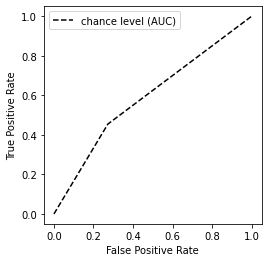

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics


print('Confusion matrix :',confusion_matrix(y_test,prediction1))
print('Accuracy score :', accuracy_score(y_test,prediction1))
print('Precision Score :', precision_score(y_test,prediction1,pos_label=1,average='macro'))
print('Recall Score :', recall_score(y_test,prediction1,pos_label=1,average='macro'))
fpr, tpr, thresholds = metrics.roc_curve(y_test, prediction1, pos_label=1)
print('fpr :', fpr)
print('tpr :', tpr)
print('thresholds :', thresholds)
auc = metrics.auc(fpr, tpr)
print('auc :', auc)

plt.plot(fpr,tpr, "k--", label="chance level (AUC)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

##AdaBoost



In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train,X_test, y_train, y_test = train_test_split(X , y, test_size=0.2)
abc = AdaBoostClassifier(n_estimators=50,learning_rate=1)
model = abc.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 1.0


## Evaluation metrics - AdaBoost

Confusion matrix : [[15  0]
 [ 0  7]]
Accuracy score : 1.0
Precision Score : 1.0
Recall Score : 1.0
fpr : [0. 0. 1.]
tpr : [0. 1. 1.]
thresholds : [2 1 0]
auc : 1.0


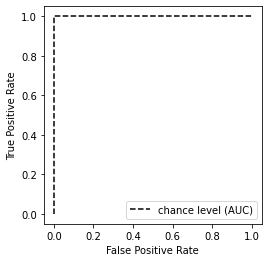

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn import metrics


print('Confusion matrix :',confusion_matrix(y_test,y_pred))
print('Accuracy score :', accuracy_score(y_test,y_pred))
print('Precision Score :', precision_score(y_test,y_pred,pos_label=1,average='macro'))
print('Recall Score :', recall_score(y_test,y_pred,pos_label=1,average='macro'))
fpr, tpr, thresholds = metrics.roc_curve(y_test,y_pred, pos_label=1)
print('fpr :', fpr)
print('tpr :', tpr)
print('thresholds :', thresholds)
auc = metrics.auc(fpr, tpr)
print('auc :', auc)

plt.plot(fpr,tpr, "k--", label="chance level (AUC)")
plt.axis("square")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

##K-fold

In [ ]:
import numpy as np
from sklearn.model_selection import KFold

kf = KFold(n_splits=2)
for train, test in kf.split(data):
  print("%s %s" % (train, test))

[ 55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47
 48 49 50 51 52 53 54] [ 55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108]
